## Principle Component 


>Reducing dimension   
>Data Compreshion   
>Noise Reduction

In [6]:
import numpy as np
import pandas as pd
from sklearn import datasets

#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
iris = datasets.load_iris()

In [67]:
X = np.array(iris.data)

In [68]:
X.shape

(150, 4)

In [69]:
type(iris)

sklearn.utils.Bunch

In [70]:
cov = np.cov(X, rowvar=False)

In [71]:
cov

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [72]:
iris_cov = pd.DataFrame(data=cov, columns=iris.feature_names)

In [73]:
iris_cov

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.685694,-0.042434,1.274315,0.516271
1,-0.042434,0.189979,-0.329656,-0.121639
2,1.274315,-0.329656,3.116278,1.295609
3,0.516271,-0.121639,1.295609,0.581006


In [74]:
iris_cov.index = iris.feature_names

In [75]:
iris_cov

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [76]:
eig_values, eig_vectors = np.linalg.eig(cov)

In [77]:
eig_values

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [78]:
eig_vectors

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [79]:
eig_values[:2]

array([4.22824171, 0.24267075])

In [80]:
sum(eig_values[:2])/sum(eig_values) #as the two col has 97% result, we can these col as feature columns

0.9776852063187949

In [81]:
featureVectors = eig_vectors[:,:2]

In [82]:
featureVectors

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

In [84]:
X_New = np.matmul(X, featureVectors)

In [86]:
X_New.shape

(150, 2)

In [89]:
df = pd.DataFrame(data = X_New, columns = ['PC1', 'PC2'])

In [93]:
y = pd.Series(iris.target)

In [101]:
y.replace({0: 'setosa', 1:'versicolor', 2:'virginica'}, inplace=True)
y


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: object

In [102]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [103]:
df['Target'] = y

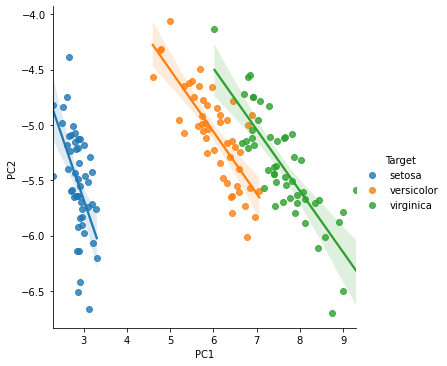

In [105]:
sns.lmplot(x='PC1', y='PC2', data = df, hue = 'Target', fit_reg=True, legend=True)